In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [2]:
games = pd.read_csv("/Users/elisabethkollrack/Thesis/EK-thesis/game_attention.csv")
# drop when attention is 0
games = games[games['attention'] > 0]
# adjust attention
# take log of attention
games['log_attention'] = np.log10(games['attention'])

games['gametime'] = games['gametime'].str.replace(':', '').astype(int)
games['date'] = pd.to_datetime(games['date'])

categorical_cols = ['weekday', 'home_team', 'away_team']
games = pd.get_dummies(games, columns=categorical_cols, drop_first=True)


In [3]:
# Nail biters (close games)
nail_biters = games[games['score_differential'] < 7]

# Middle range games
middle_games = games[(games['score_differential'] >= 7) & (games['score_differential'] <= 15)]

# Blowouts
blowouts = games[games['score_differential'] > 15]


In [4]:
nail_biters.head()


,date,game_id,season,week,gametime,home_win_pct,away_win_pct,num_lead_changes,total_score,score_differential,...,away_team_OAK,away_team_PHI,away_team_PIT,away_team_SD,away_team_SEA,away_team_SF,away_team_STL,away_team_TB,away_team_TEN,away_team_WAS
1,2013-09-08,2013_01_NE_BUF,2013,1,1300,0.0,0.0,2,44,2,...,False,False,False,False,False,False,False,False,False,False
2,2013-09-08,2013_01_SEA_CAR,2013,1,1300,0.0,0.0,2,19,5,...,False,False,False,False,True,False,False,False,False,False
3,2013-09-08,2013_01_CIN_CHI,2013,1,1300,0.0,0.0,2,45,3,...,False,False,False,False,False,False,False,False,False,False
6,2013-09-08,2013_01_OAK_IND,2013,1,1300,0.0,0.0,2,38,4,...,True,False,False,False,False,False,False,False,False,False
8,2013-09-08,2013_01_ATL_NO,2013,1,1300,0.0,0.0,3,40,6,...,False,False,False,False,False,False,False,False,False,False


In [5]:
middle_games.head()

,date,game_id,season,week,gametime,home_win_pct,away_win_pct,num_lead_changes,total_score,score_differential,...,away_team_OAK,away_team_PHI,away_team_PIT,away_team_SD,away_team_SEA,away_team_SF,away_team_STL,away_team_TB,away_team_TEN,away_team_WAS
4,2013-09-08,2013_01_MIA_CLE,2013,1,1300,0.0,0.0,2,33,13,...,False,False,False,False,False,False,False,False,False,False
5,2013-09-08,2013_01_MIN_DET,2013,1,1300,0.0,0.0,1,58,10,...,False,False,False,False,False,False,False,False,False,False
10,2013-09-08,2013_01_TEN_PIT,2013,1,1300,0.0,0.0,1,25,7,...,False,False,False,False,False,False,False,False,True,False
17,2013-09-15,2013_02_STL_ATL,2013,2,1300,0.0,1.0,0,55,7,...,False,False,False,False,False,False,True,False,False,False
18,2013-09-15,2013_02_CLE_BAL,2013,2,1300,0.0,0.0,1,20,8,...,False,False,False,False,False,False,False,False,False,False


In [6]:
blowouts.head()

,date,game_id,season,week,gametime,home_win_pct,away_win_pct,num_lead_changes,total_score,score_differential,...,away_team_OAK,away_team_PHI,away_team_PIT,away_team_SD,away_team_SEA,away_team_SF,away_team_STL,away_team_TB,away_team_TEN,away_team_WAS
0,2013-09-05,2013_01_BAL_DEN,2013,1,2030,0.0,0.0,1,76,22,...,False,False,False,False,False,False,False,False,False,False
7,2013-09-08,2013_01_KC_JAX,2013,1,1300,0.0,0.0,1,30,26,...,False,False,False,False,False,False,False,False,False,False
21,2013-09-15,2013_02_WAS_GB,2013,2,1300,0.0,0.0,0,58,18,...,False,False,False,False,False,False,False,False,False,True
28,2013-09-15,2013_02_DEN_NYG,2013,2,1625,0.0,1.0,3,64,18,...,False,False,False,False,False,False,False,False,False,False
30,2013-09-15,2013_02_SF_SEA,2013,2,2030,1.0,1.0,0,32,26,...,False,False,False,False,False,True,False,False,False,False


In [7]:
print("Games in the nail biters df: ", nail_biters.shape)
print("Games in the middle games df: ", middle_games.shape)
print("Games in the blowouts df: ", blowouts.shape)

Games in the nail biters df:  (489, 82)
Games in the middle games df:  (423, 82)
Games in the blowouts df:  (367, 82)


In [8]:
# average attention in each df
print("Average attention in nail biters: ", nail_biters['attention'].mean())
print("Median attention in nail biters: ", nail_biters['attention'].median())
print("Average attention in middle games: ", middle_games['attention'].mean())
print("Median attention in middle games: ", middle_games['attention'].median())
print("Average attention in blowouts: ", blowouts['attention'].mean())
print("Median attention in blowouts: ", blowouts['attention'].median())

Average attention in nail biters:  1990.758691206544
Median attention in nail biters:  1222.0
Average attention in middle games:  1819.952718676123
Median attention in middle games:  1148.0
Average attention in blowouts:  1756.3378746594005
Median attention in blowouts:  1097.0


In [9]:
# average attention in each df
print("Average attention in nail biters: ", nail_biters['log_attention'].mean())
print("Median attention in nail biters: ", nail_biters['log_attention'].median())
print("Average attention in middle games: ", middle_games['log_attention'].mean())
print("Median attention in middle games: ", middle_games['log_attention'].median())
print("Average attention in blowouts: ", blowouts['log_attention'].mean())
print("Median attention in blowouts: ", blowouts['log_attention'].median())

Average attention in nail biters:  3.014809512679091
Median attention in nail biters:  3.0870712059065353
Average attention in middle games:  2.9897151902016232
Median attention in middle games:  3.059941888061955
Average attention in blowouts:  2.9687137646358255
Median attention in blowouts:  3.0402066275747113


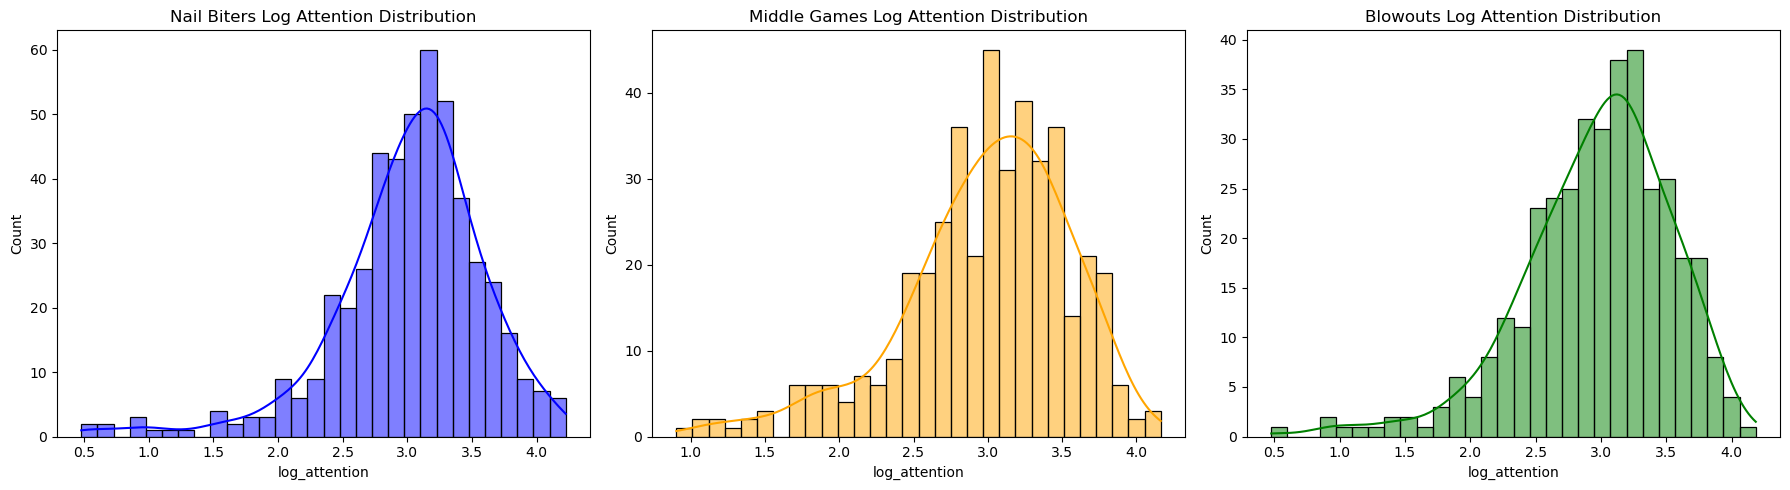

In [10]:
# plots of 3 data frames
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(nail_biters['log_attention'], bins=30, kde=True, color='blue')
plt.title('Nail Biters Log Attention Distribution')
plt.subplot(1, 3, 2)
sns.histplot(middle_games['log_attention'], bins=30, kde=True, color='orange')
plt.title('Middle Games Log Attention Distribution')
plt.subplot(1, 3, 3)
sns.histplot(blowouts['log_attention'], bins=30, kde=True, color='green')
plt.title('Blowouts Log Attention Distribution')
plt.tight_layout()
plt.show()


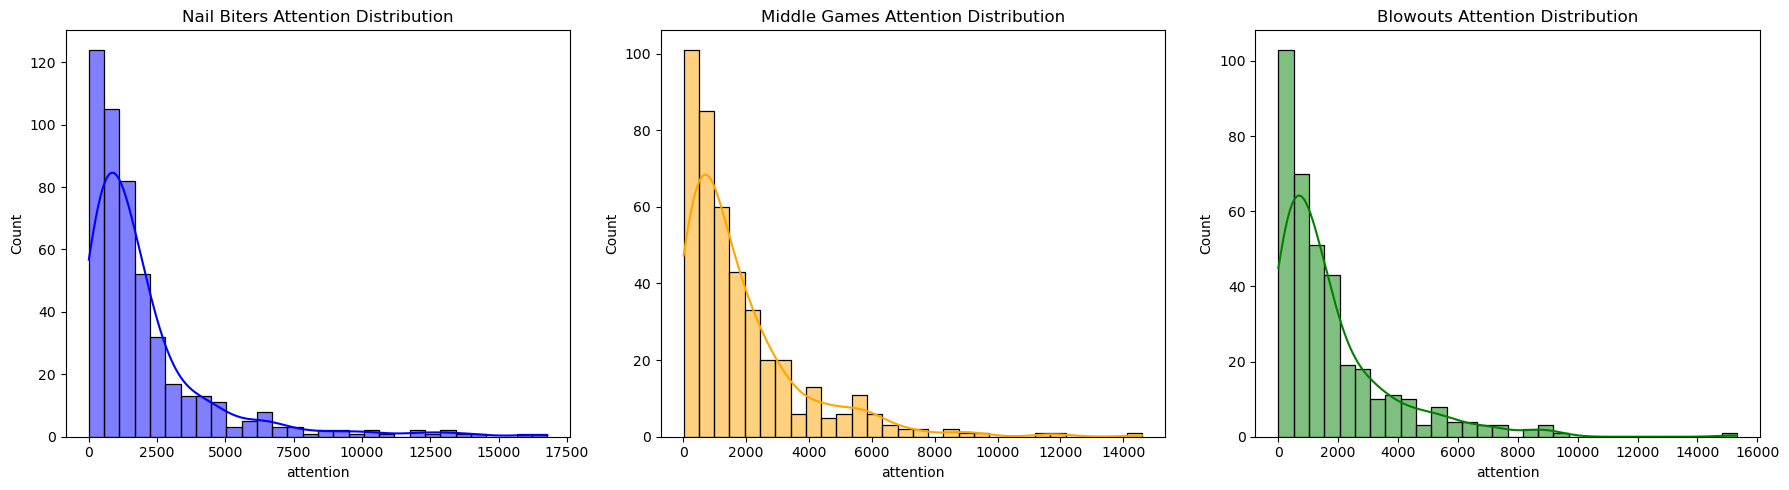

In [11]:
# plots of 3 data frames
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(nail_biters['attention'], bins=30, kde=True, color='blue')
plt.title('Nail Biters Attention Distribution')
plt.subplot(1, 3, 2)
sns.histplot(middle_games['attention'], bins=30, kde=True, color='orange')
plt.title('Middle Games Attention Distribution')
plt.subplot(1, 3, 3)
sns.histplot(blowouts['attention'], bins=30, kde=True, color='green')
plt.title('Blowouts Attention Distribution')
plt.tight_layout()
plt.show()


In [12]:
X = nail_biters.drop(columns=['attention','log_attention', 'game_id', 'date', 'score_differential'])  
y = nail_biters['log_attention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 0.35537895231527106
R^2: 0.6041425854891938


In [13]:
X = middle_games.drop(columns=['attention','log_attention', 'game_id', 'date', 'score_differential']) 
y = middle_games['log_attention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 0.3965205780548704
R^2: 0.4828991954446481


In [14]:
X = blowouts.drop(columns=['attention','log_attention', 'game_id', 'date', 'score_differential'])  
y = blowouts['log_attention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 0.38638265836489954
R^2: 0.651360944761916
